<a href="https://colab.research.google.com/github/brandon-baek/MNIST-Handwritten-Digit-KNN-Project/blob/main/MNIST_Handwritten_Digit_KNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Handwritten Digit KNN Project**
---

**By Brandon Baek**

The K-nearest neighbor model is implemented to detect handwritten digits using the MNIST Dataset.

---

## Introduction

---

Today, MNIST Handwritten Digit Dataset trained models utilize machine learning. Although machine learning is a large portion of Artificial Intelligence, it is important to acknowledge that Artificial Intelligence is far more than just Machine Learning. Studies focused on Machine Learning will expand upon Machine Learning, but will not expand much onto Artifical Intelligence in a general-sense.

For these reasons, it is important to acknowledge, understand, and employ the vast techniques within the field of Artificial Intelligence.

This project makes use of a non-machine-learning based algorithm, the K-Nearest Neighbors model, to predict handwritten digits.

---

# **Prerequisites**


In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# **Analysis & Data Cleanup**

---

Dataset import and glance.

---

In [204]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
test_df = pd.read_csv('/content/sample_data/mnist_test.csv')

df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

Google Colab automatically names columns randomly if not pre-assigned. So we must name the columns to be more easily parseable.

---

In [205]:
df.columns = [i for i in range(785)]
test_df.columns = [i for i in range(785)]

df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **KNN**

---

This section sets up a K Nearest Neighbors model for classification.

---

Each data point will be a vector containing a 1D flattened version of each image. Then the Euclidean distance between all vectors and a new vector is calculated. Finally, the K Nearest Neighbors are picked and most common is chosen.

---

In [206]:
def KNN(new_point, neighbors, k):
    distances = [np.linalg.norm(neighbor - new_point) for neighbor in neighbors]
    nearest_neighbors = sorted(distances)[:k]
    categories = [df.iloc[:, 0][distances.index(nearest_neighbor)] for nearest_neighbor in nearest_neighbors]
    return max(set(categories), key=categories.count)

## Evaluation

---

Inference: In the code below, it utilizes data already provided by the training_dataset. Usage of new image data is completely possible.


The current KNN model has K=10. This can be optimized through continuous trial and error.

---

In [207]:
X_train = df.iloc[:, 1:].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

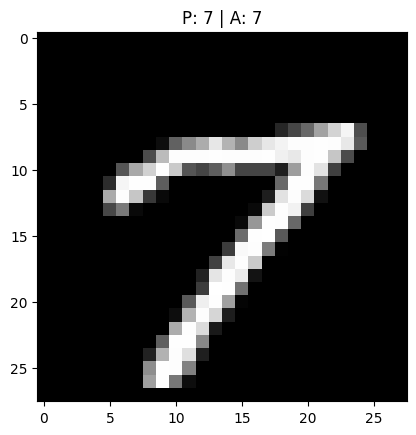

In [208]:
idx = 1999

pred = KNN(df.iloc[idx, 1:], X_train, 10)
label = df.iloc[:, 0][idx]

image_data = np.array(df.iloc[idx, 1:]).reshape(28, 28)
plt.title(f'P: {pred} | A: {label}')
plt.imshow(image_data, cmap='gray')

---

Evaluating model on test dataset.

---

In [209]:
errors = 0
total = len(test_df.values)

predictions = KNN(df.iloc[idx, 1:], X_test, 15)
errors = sum(predictions != y_test)

error_percent = (errors / total) * 100

In [210]:
print(f'{error_percent}% ({errors}/{total}) wrong.')

88.64886488648865% (8864/9999) wrong.


---

That's pretty bad!

---

# **Conclusion**

---

Although the results were not favorable, further optimizations show immense potential for this model. This project reveals the true functionality of non-machine-learning algorithms in a variety of situations. KNN classification is a very simplistic method that is a lot less computationally expensive as machine learning models.

---